In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Load Clean Data

In [2]:
data = pd.read_csv("Ansar1Clean.csv", index_col=0)
data.head()

,﻿MessageID,ThreadID,ThreadName,MemberID,MemberName,Message,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID
2,10004,1197,Latest Coalition Fatalities - Iraq/Afghanistan...,54,ANSAR 007,Iraq Office of the Assistant Secretary of Defe...,2009,4,22,2009-04-22 00:00:00.000,2051
16,10024,1165,GIMF: &quot;Glad Tiding for the Believers and ...,54,ANSAR 007,Full/whole document translated in english lang...,2009,4,22,2009-04-22 00:00:00.000,2004
66,10088,1165,GIMF: &quot;Glad Tiding for the Believers and ...,7,Abu Irsaad,Quote: Originally Posted by Acer007 Full/whole...,2009,4,22,2009-04-22 00:00:00.000,2004
69,10091,1165,GIMF: &quot;Glad Tiding for the Believers and ...,12,Insurgent,Quote: Originally Posted by Abu Irsaad as-Sala...,2009,4,22,2009-04-22 00:00:00.000,2004
73,10112,813,Images from Islamic Emirate of Caucasus,74,Abu Anas al-Ansari,"as-Salamu ‘alaykum,",2009,4,23,2009-04-23 00:00:00.000,1403


In [3]:
sentiments = pd.read_csv("sentimentData.csv", index_col = False)
sentiments.head()

,thread,sentiment
0,1197.0,-0.695210
1,4031.0,-0.789300
2,4032.0,-0.191782
3,4033.0,0.000000
4,3987.0,-0.251567


In [4]:
data["sentiment"] = sentiments["sentiment"]

In [5]:
#get all threads
threads = data["ThreadID"].unique()

threads = threads[:100]

In [6]:
data["ThreadID"].isin(threads)

2        True
16       True
66       True
69       True
73       True
         ... 
29317    True
29426    True
29427    True
29464    True
29466    True
Name: ThreadID, Length: 2363, dtype: bool

# Make Graph

In [7]:
edges = []
weights = []
for i in range(0,len(threads)):
    for j in range(0, len(threads)):
        if i >= j:
            pass
        else:
            thread1 = data[data["ThreadID"] == threads[i]]["MemberID"]
            thread2 = data[data["ThreadID"] == threads[j]]["MemberID"]
            intersection = len(np.intersect1d(thread1,thread2))
            if intersection > 0:
                edges.append([threads[i],threads[j]])
                weights.append(intersection)
        

In [8]:
G = nx.Graph()
G.add_nodes_from(threads)
G.add_edges_from(edges)

nodeDict = dict(zip(threads,data["sentiment"][data["ThreadID"].isin(threads)]))
edgeDict = dict(zip(G.edges,weights))

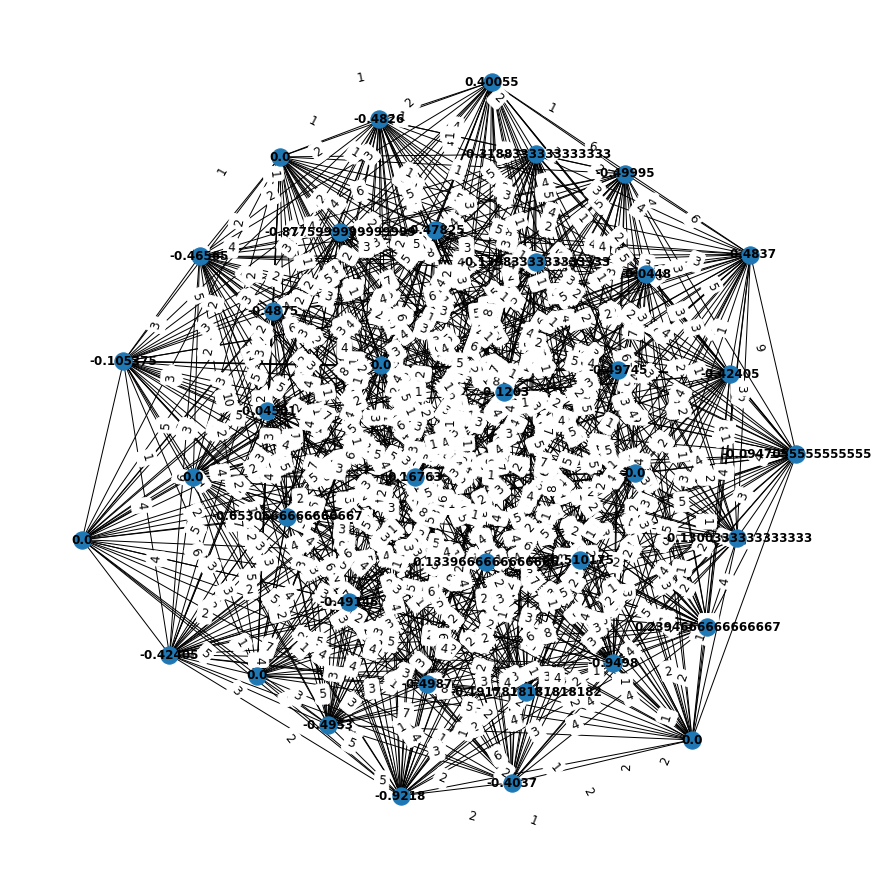

In [9]:

plt.figure(figsize = (12,12))

pos=nx.spring_layout(G)
nx.draw(G,labels = nodeDict, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edgeDict, label_pos=0.5, font_size = 12)


plt.savefig("threadGraph.png")

study individual threads first and make graphs of commenters and their overall sentiment
